Analyzing Instagram Engagement
What do we want to answer?
What type of content engages the most oy company's Instagram?

We have the Instagram database since the user started posting on the brand until March 27th

He also gives some directions:
You can ignore th (visualizacoes)e views column, we only want to understand likes, comments and interactions
Empty tags do not really have a tag (please treat as empty)

In [112]:
import pandas as pd
url = "https://github.com/barbosa-g/insta/raw/main/08.%20Analisando%20o%20engajamento%20no%20Instagram.xlsx"
o_base = pd.read_excel(url)
o_base.head(5)

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,"82,878.00",Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


In [113]:
o_base.iloc[0:0]

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes


In [114]:
# Rename columns headers
base = o_base.rename(columns={
    'Tipo': 'Type',
    'Data': 'Date',
    'Curtidas': 'Likes',
    'Comentários': 'Comments',
    'Pessoas': 'People',
    'Campanhas': 'Campaign',
    'Visualizações' : 'Views',
    'Carrossel': 'Carousel',
    'Interacoes ': 'Interactions'})


In [115]:
base.head()

,Type,Date,Likes,Comments,Views,Tags,People,Campaign,Carousel,Interactions
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,"82,878.00",Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


### As asked DO NOT consider VIEWS column, let's DROP this column from the base
The .drop() allows you to delete a column or row: base.drop(column_name,axis=1)
- Axis = 1 refers to the column, while axis = 0 refers to the row
- In case of more than 1 column, we put the list in square brackets

In [116]:
# drop column "Visualizações" WHICH now is Views
base = base.drop("Views",axis=1)
# Visualizando novamente as 5 primeiras linhas

In [117]:
base.head(5)

,Type,Date,Likes,Comments,Tags,People,Campaign,Carousel,Interactions
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [118]:
base.tail()

,Type,Date,Likes,Comments,Tags,People,Campaign,Carousel,Interactions
47,IGTV,2022-03-12,5489,77,Dicas de como usar/Novos Produtos,S,N,NaN,5566
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,NaN,29563
49,Foto,2022-03-22,9087,106,NaN,S,S,NaN,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,NaN,16737
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,NaN,4999


Se a base for pequena, o display mostra a base completa - 
display(base)

In [159]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Type          52 non-null     object        
 1   Date          52 non-null     datetime64[ns]
 2   Likes         52 non-null     int64         
 3   Comments      52 non-null     int64         
 4   Tags          44 non-null     object        
 5   People        52 non-null     object        
 6   Campaign      52 non-null     object        
 7   Carousel      52 non-null     object        
 8   Interactions  52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


### Carousel has only 8 non-null values - Let's understand carousel values

In [120]:
# Carousel Count
base.Carousel.value_counts()

Carousel
S    8
Name: count, dtype: int64

- In fact, the null values are from non-Carousel posts. Therefore the null should be "N"

### Treating null values

In [121]:
# Select Carousel NULL
base.loc[base.Carousel.isnull()].head()

,Type,Date,Likes,Comments,Tags,People,Campaign,Carousel,Interactions
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [122]:
# Select Carousel NOT NULL
base.loc[base.Carousel.notnull()].head()

,Type,Date,Likes,Comments,Tags,People,Campaign,Carousel,Interactions
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444
12,Foto,2021-10-21,6166,55,Novos Produtos,S,S,S,6221
21,Foto,2021-12-23,8328,93,Produtos,S,N,S,8421
25,Foto,2022-01-02,12193,138,Novos Produtos,S,N,S,12331


In [123]:
# select Carousel column
base.loc[base.Carousel.isnull(),'Carousel'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Carousel, dtype: object

In [124]:
# change NaN to "N"
base.loc[base.Carousel.isnull(),'Carousel'] = "N"

### **Checking Carousel values:**

In [125]:
# Select Carousel again - now should not have NaN (NULL)
base.loc[base.Carousel.isnull(),'Carousel'].head()

Series([], Name: Carousel, dtype: object)

In [126]:
# Check base info - Carousel now are 52 non-null
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Type          52 non-null     object        
 1   Date          52 non-null     datetime64[ns]
 2   Likes         52 non-null     int64         
 3   Comments      52 non-null     int64         
 4   Tags          44 non-null     object        
 5   People        52 non-null     object        
 6   Campaign      52 non-null     object        
 7   Carousel      52 non-null     object        
 8   Interactions  52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


In [127]:
base.Carousel.value_counts()

Carousel
N    44
S     8
Name: count, dtype: int64

### Showing statistical information

In [128]:
base.describe()

,Date,Likes,Comments,Interactions
count,52,52.00,52.00,52.00
mean,2021-12-23 04:36:55.384615424,"12,262.73",189.50,"12,452.23"
min,2021-09-11 00:00:00,"2,807.00",9.00,"2,816.00"
25%,2021-10-23 06:00:00,"5,492.00",69.50,"5,562.50"
50%,2022-01-05 00:00:00,"9,603.00",128.00,"9,773.50"
75%,2022-02-15 12:00:00,"17,621.75",265.25,"17,920.75"
max,2022-03-27 00:00:00,"37,351.00",852.00,"37,853.00"
std,NaN,"8,165.88",170.69,"8,299.39"


### Visualizing this information graphically

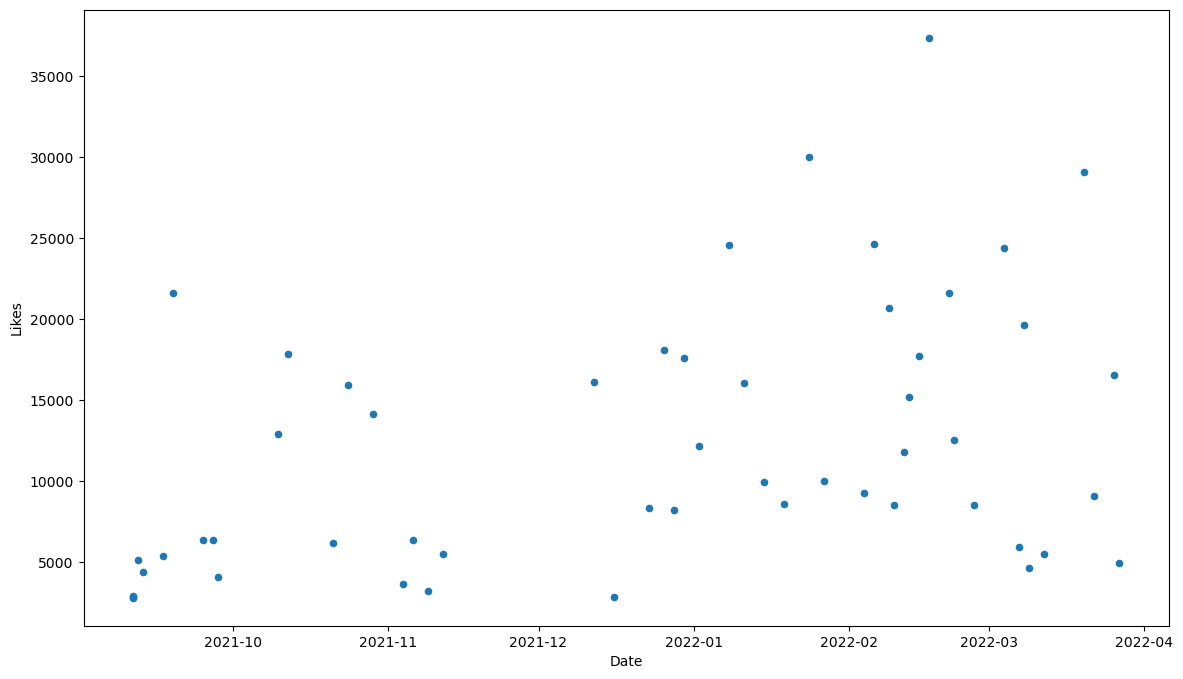

In [129]:
# Um gráfico de dispersão ajudaria a entender melhor curtidas e comentários
base.plot(kind="scatter",x="Date",y="Likes",figsize=(14,8));

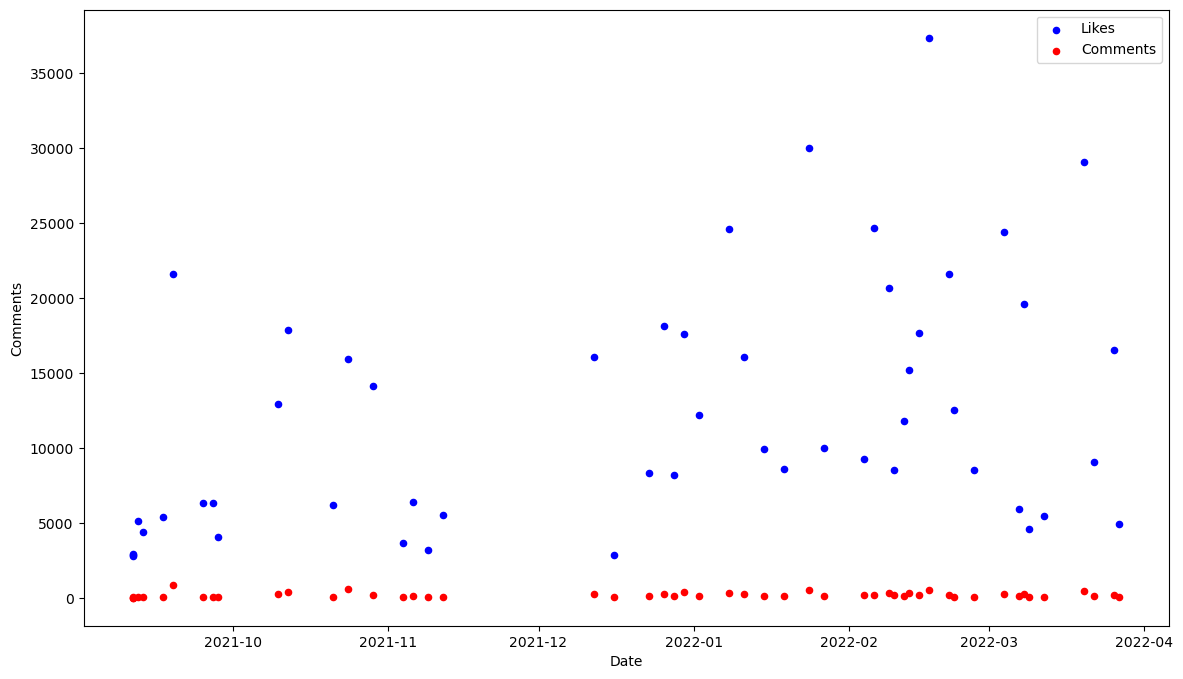

In [130]:
# Podemos colocar curtidas e comentários no mesmo gráfico
ax = base.plot(kind="scatter",x="Date",y="Likes",color="blue",label="Likes",figsize=(14,8));
base.plot(kind="scatter",x="Date",y="Comments",color="red",label="Comments",figsize=(14,8),ax=ax);

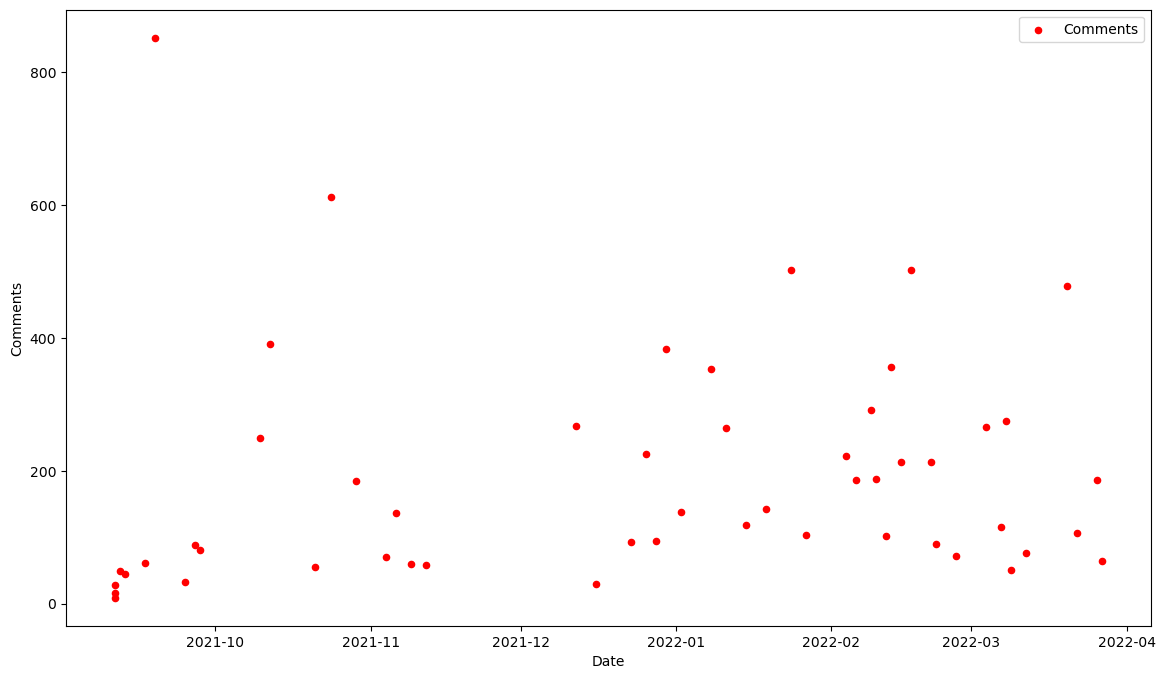

In [131]:
# A escala de curtidas pode estar atrapalhando a visualização, por isso vamos deixar comentários em um gráfico separado
base.plot(kind="scatter",x="Date",y="Comments",color="red",label="Comments",figsize=(14,8));

- The graph and statistical information are not saying much as there is a large dispersion between likes and comments
- We need to check if there is a pattern using the other columns of information

### The first thing we can do is get the first 5 records with the most and least likes

In [132]:
# Sort Values ASC
base.sort_values(by="Likes",ascending=False).head()

,Type,Date,Likes,Comments,Tags,People,Campaign,Carousel,Interactions
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [133]:
# Last values
base.sort_values(by="Likes",ascending=True).head()

,Type,Date,Likes,Comments,Tags,People,Campaign,Carousel,Interactions
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273


- We can see that in the top 5 all posts had people and were campaign photos
- In the 5 worst posts, there were no people and they were not campaign posts
<br><br>
- **This could be an indicator that people and campaigns are related to likes**

### Let's use <font color="blue">group by</font> to better understand the data

**The group by is very similar to the pivot table we create in Excel**

In [134]:
# Format values
pd.options.display.float_format = '{:,.2f}'.format

In [135]:
# Group by
base.groupby("Type")["Likes"].mean()

Type
Foto    13,341.14
IGTV     6,833.40
Reels   14,873.00
Vídeo    8,141.50
Name: Likes, dtype: float64

- **In this case it may seem that video and IGTV are bad strategies that should not be used**

**Groupby allows us to aggregate data, which makes visualization much easier** <br>
base.<font color="blue">**groupby**</font>("<font color="red">**coluna1**</font>")["<font color="green"> **coluna2**</font>"].<font color="purple">**aggregacao_funcao()**</font>

- Groupby will aggregate by <font color="red">**coluna1**</font>
- The <font color="purple">**aggregation function**</font> will be applied to <font color="green">**column2**</font>

In [136]:
# Group by Type and People
base.groupby(["People","Type"])["Likes"].mean()

People  Type 
N       Foto     3,863.50
        Reels    5,934.50
        Vídeo    4,007.50
S       Foto    15,236.67
        IGTV     6,833.40
        Reels   20,832.00
        Vídeo   16,409.50
Name: Likes, dtype: float64

**And also apply the aggregation function to several other columns:** <br>

In [137]:
base.groupby(["People","Type"])[["Likes",'Comments']].mean()

Likes  Comments
People Type                     
N      Foto   3,863.50     29.50
       Reels  5,934.50     98.00
       Vídeo  4,007.50     65.25
S      Foto  15,236.67    226.20
       IGTV   6,833.40    133.60
       Reels 20,832.00    342.00
       Vídeo 16,409.50    370.00

In [138]:
# Incl. Campaign Column
base.groupby(["People", "Type", "Campaign"])[["Likes",'Comments']].mean()

Likes  Comments
People Type  Campaign                    
N      Foto  N         2,869.00     20.50
             S         5,852.50     47.50
       Reels N         5,934.50     98.00
       Vídeo N         4,007.50     65.25
S      Foto  N        10,815.29    159.93
             S        19,105.38    284.19
       IGTV  N         6,833.40    133.60
       Reels N        12,894.00    249.00
             S        24,801.00    388.50
       Vídeo S        16,409.50    370.00

- Groupby now allows you to see which campaign posts have a high level of engagement and with photos of people too

**We can then make the groupings we think best to understand our data**

In [139]:
# People
base.groupby(["People"])[["Likes",'Comments']].mean()

,Likes,Comments
People,,
N,"4,256.67",52.83
S,"14,664.55",230.50


- **Posts with people engage much more for this brand, being 3 times higher than when there are no people**

In [140]:
# Campaign
base.groupby(["Campaign"])[["Likes",'Comments']].mean()

,Likes,Comments
Campaign,,
N,"7,928.33",123.17
S,"18,173.27",279.95


- **When it's a campaign post, engagement is also better!**

In [147]:
# Carousel (no filter) - WRONG ANALYSIS
base.groupby(["Carousel"])[["Likes",'Comments']].mean()

,Likes,Comments
Carousel,,
N,"12,343.61",198.43
S,"11,817.88",140.38


In [149]:
# Filter base Type Foto
base[base.Type == 'Foto'].groupby(["Carousel"])[["Likes",'Comments']].mean()

,Likes,Comments
Carousel,,
N,"13,776.36",208.57
S,"11,817.88",140.38


- **The average without using a carousel is better than when we use it, so it's not something that can have much of an impact on the results of this company's media initially looking at it**
     - In this case we must filter only the photos as we only have a carousel in photos. Without this filter we would be comparing the wrong things

**By putting people and campaigns together we can see how this difference occurs**

In [151]:
# Agregando por pessoas e campanhas
base.groupby(["People", "Campaign"])[["Likes",'Comments']].mean()

Likes  Comments
People Campaign                    
N      N         3,937.50     53.90
       S         5,852.50     47.50
S      N         9,923.75    157.80
       S        19,405.35    303.20

- **Putting people and campaigns together we can see how this difference occurs**- **The average when there are people AND it's a campaign post is around 19.4 thousand likes, whereas when it's just people (without a campaign it goes up to almost 10 thousand and if there are no people it reaches a maximum of 5.9 thousand even in campaigns**
<br><br>
- **In this case, we can already show the company the importance of including people using their products, which generates a considerable increase in engagement**

In [152]:
# Agregando por pessoas, campanhas e tipo
base.groupby(["People", "Campaign", "Type"])[["Likes",'Comments']].mean()

Likes  Comments
People Campaign Type                     
N      N        Foto   2,869.00     20.50
                Reels  5,934.50     98.00
                Vídeo  4,007.50     65.25
       S        Foto   5,852.50     47.50
S      N        Foto  10,815.29    159.93
                IGTV   6,833.40    133.60
                Reels 12,894.00    249.00
       S        Foto  19,105.38    284.19
                Reels 24,801.00    388.50
                Vídeo 16,409.50    370.00

- **Analyzing the video again, it doesn't seem that bad anymore. When done in a campaign and using people it had a good result, even close to the photo**
- What could have led to the low average is that we only have video either WITH a person and WITH a campaign or without either. We don't have any videos with just one of the two (person or campaign)
- IGTV, even though it had people, didn't have such a good result

    #### We can even understand what had generated the low average in the video

In [158]:
# Filter base Type Vídeo
base[base.Type == 'Vídeo']

,Type,Date,Likes,Comments,Tags,People,Campaign,Carousel,Interactions
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576


- **Here we noticed that the store tried to post 4 videos showing its products (without any people) and the result was low. When the video was made with people taking advantage of trends and commemorative dates, the result was very good!**

## Conclusions
- **In an initial analysis, posts including people engage much more than those without anyone**
- **Posts during campaign times also have better engagement**
- **On this basis, the carousel was not a differentiator to improve brand engagement**